In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='ticks', context='poster', font_scale=0.9,
            rc={'xtick.major.size': 3,
                'ytick.major.size': 3,
                'xtick.major.width': 1,
                'ytick.major.width': 1,
                'xtick.major.pad': 3.5,
                'ytick.major.pad': 3.5,
                'axes.linewidth': 1,
                'lines.linewidth': 2,
               })

from src.data_processing import read_netcdfs

In [3]:
ripple_info = read_netcdfs(
    '../Processed-Data/*.nc', dim='session', group='/ripple_info'
).to_dataframe().set_index(['animal', 'day', 'epoch']).dropna()

In [4]:
ripple_info.head(5)

ripple_number ripple_trajectory ripple_direction  \
animal day epoch                                                     
HPa    1.0 4.0              1.0           inbound          forward   
           6.0              6.0          outbound          reverse   
       2.0 2.0              8.0          outbound          reverse   
           4.0              2.0           inbound          reverse   
       3.0 2.0              1.0          outbound          reverse   

                  ripple_state_probability  ripple_start_time  \
animal day epoch                                                
HPa    1.0 4.0                    0.802458        5868.271933   
           6.0                    0.847661        7937.995967   
       2.0 2.0                    0.931485        5171.870933   
           4.0                    0.895663        7090.614267   
       3.0 2.0                    0.768765        2670.668767   

                  ripple_end_time  number_of_unique_neurons_spiking  \
animal day epoch                                                      
HPa    1.0 4.0        5868.376600                               9.0   
           6.0        7938.078633                              11.0   
       2.0 2.0        5171.904933                              10.0   
           4.0        7090.725600                              12.0   
       3.0 2.0        2670.733433                              11.0   

                  number_of_spikes session_time is_spike trajectory_direction  \
animal day epoch                                                                
HPa    1.0 4.0               112.0        early  isSpike             Outbound   
           6.0               147.0        early  isSpike             Outbound   
       2.0 2.0                41.0        early  isSpike             Outbound   
           4.0               127.0        early  isSpike              Inbound   
       3.0 2.0                98.0        early  isSpike             Outbound   

                 trajectory_turn  trial_number  linear_distance  x_position  \
animal day epoch                                                              
HPa    1.0 4.0              Left           1.0         1.434215   97.405855   
           6.0              Left           4.0        67.943744   95.732956   
       2.0 2.0              Left          25.0       144.433064   98.402335   
           4.0             Right           5.0         0.032428   76.425216   
       3.0 2.0              Left           1.0        73.730578   98.949674   

                  y_position  head_direction     speed  linear_position  \
animal day epoch                                                          
HPa    1.0 4.0     94.164243        0.967537  2.024030         1.370102   
           6.0     27.994463       -0.929537  1.626186        67.933032   
       2.0 2.0     76.283320        1.512809  1.296963       144.554243   
           4.0     80.589905        1.633632  0.876893         0.607607   
       3.0 2.0     24.943667       -2.400347  3.739987        73.811897   

                 ripple_motion  
animal day epoch                
HPa    1.0 4.0         Towards  
           6.0            Away  
       2.0 2.0         Towards  
           4.0            Away  
       3.0 2.0         Towards

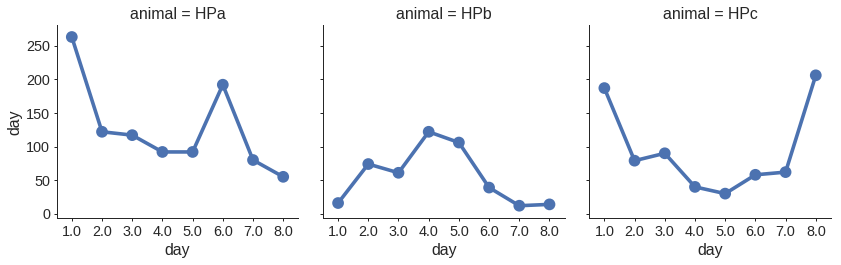

In [17]:
sns.factorplot(data=ripple_info.reset_index(), x='day', y='day', estimator=len, col='animal');

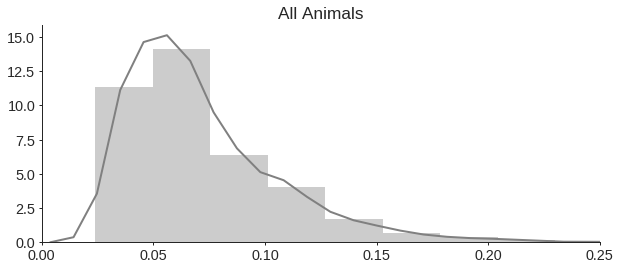

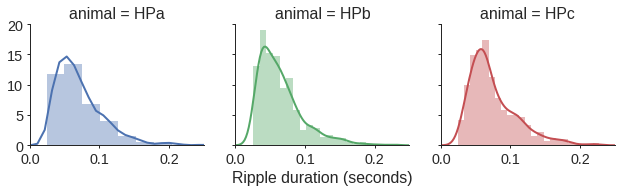

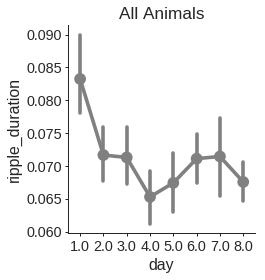

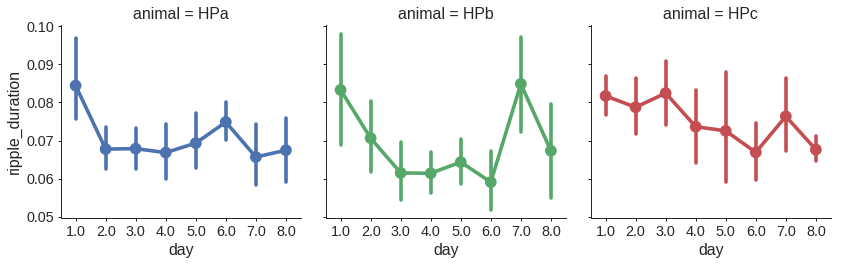

In [18]:
ripple_duration = ripple_info.ripple_end_time - ripple_info.ripple_start_time
ripple_duration.name = 'ripple_duration'


f, ax = plt.subplots(1, 1, figsize=(10, 4))
sns.distplot(ripple_duration, ax=ax, color='grey')
ax.set_xlim((0, 0.250))
plt.title('All Animals')
plt.xlabel('')
sns.despine()

g = sns.FacetGrid(ripple_duration.reset_index(), col='animal', hue='animal',
                  sharex=True, sharey=True, xlim=(0,.250))
g.map(sns.distplot, 'ripple_duration');
g.axes[0, 1].set_xlabel('Ripple duration (seconds)')
g.axes[0, 0].set_xlabel('')
g.axes[0, 2].set_xlabel('');

g = sns.factorplot(data=ripple_duration.reset_index(), x='day', y='ripple_duration', color='grey');
# g.map(plt.axvspan, xmin=0, xmax=4, alpha=0.1, facecolor='grey')
plt.title('All Animals')
g = sns.factorplot(data=ripple_duration.reset_index(),
                   x='day', y='ripple_duration', col='animal',
                   hue='animal');
# g.map(plt.axvspan, xmin=0, xmax=4, alpha=0.1, facecolor='grey')

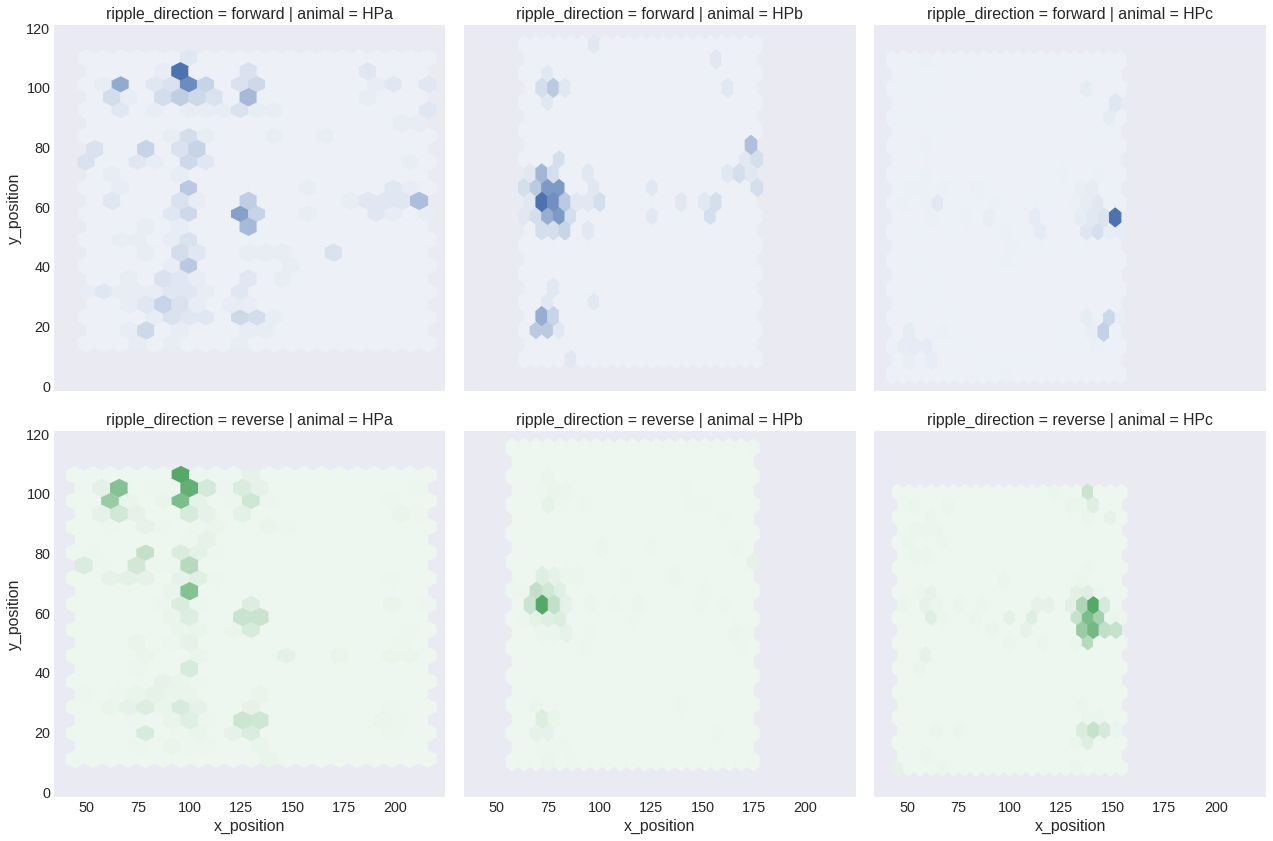

In [24]:
def hexbin(x, y, color, **kwargs):
    cmap = sns.light_palette(color, as_cmap=True)
    plt.hexbin(x, y, gridsize=20, cmap=cmap, **kwargs)

with sns.axes_style("dark"):
    g = sns.FacetGrid(ripple_info.reset_index(), row='ripple_direction', col='animal', hue='ripple_direction', size=6)
g.map(hexbin, 'x_position', 'y_position');

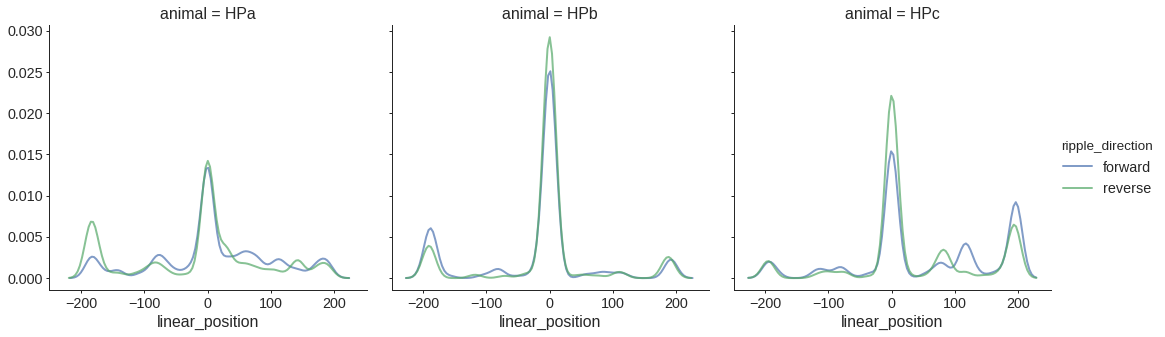

In [58]:
g = sns.FacetGrid(ripple_info.reset_index(), col='animal', hue='ripple_direction', size=5)
g.map(sns.kdeplot, 'linear_position', alpha=0.7, bw=10);
g.add_legend();

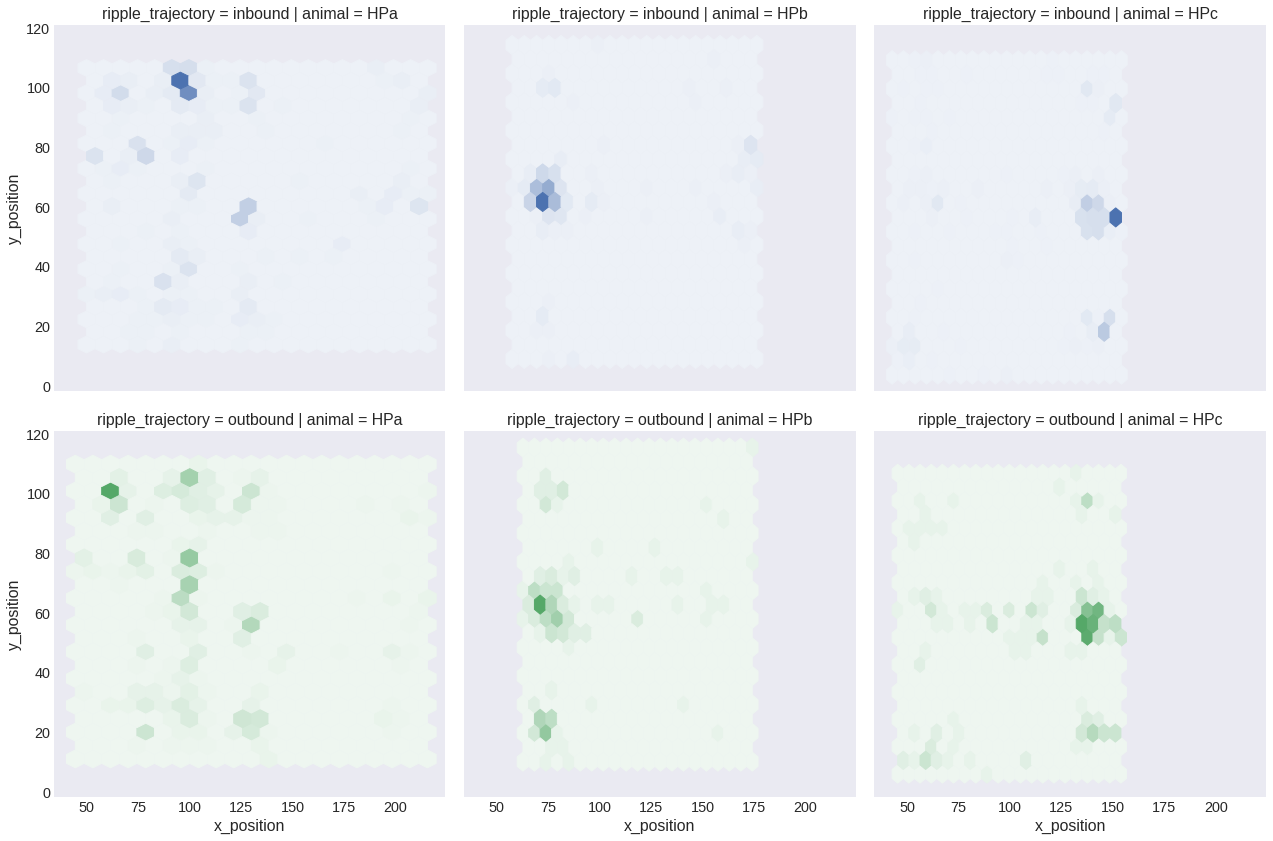

In [25]:
covariate = 'ripple_trajectory'
with sns.axes_style("dark"):
    g = sns.FacetGrid(ripple_info.reset_index(), row=covariate, col='animal', hue=covariate, size=6)
g.map(hexbin, 'x_position', 'y_position');

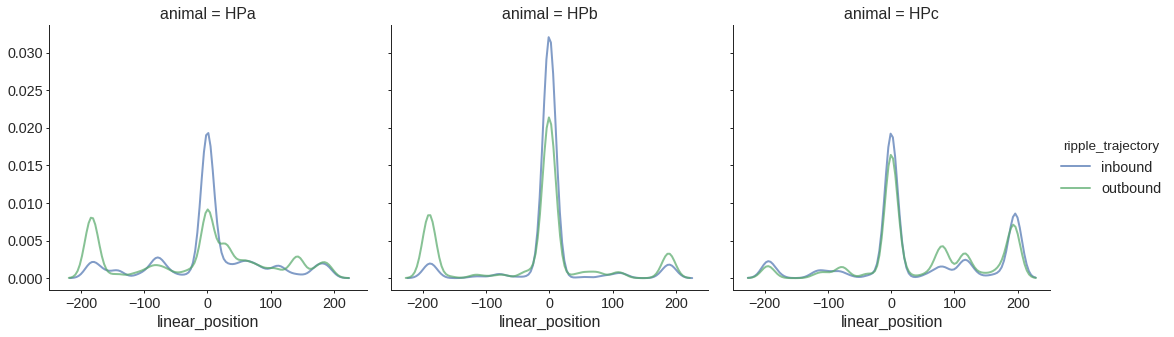

In [59]:
covariate = 'ripple_trajectory'
g = sns.FacetGrid(ripple_info.reset_index(), col='animal', hue=covariate, size=5)
g.map(sns.kdeplot, 'linear_position', alpha=0.7, bw=10);
g.add_legend();

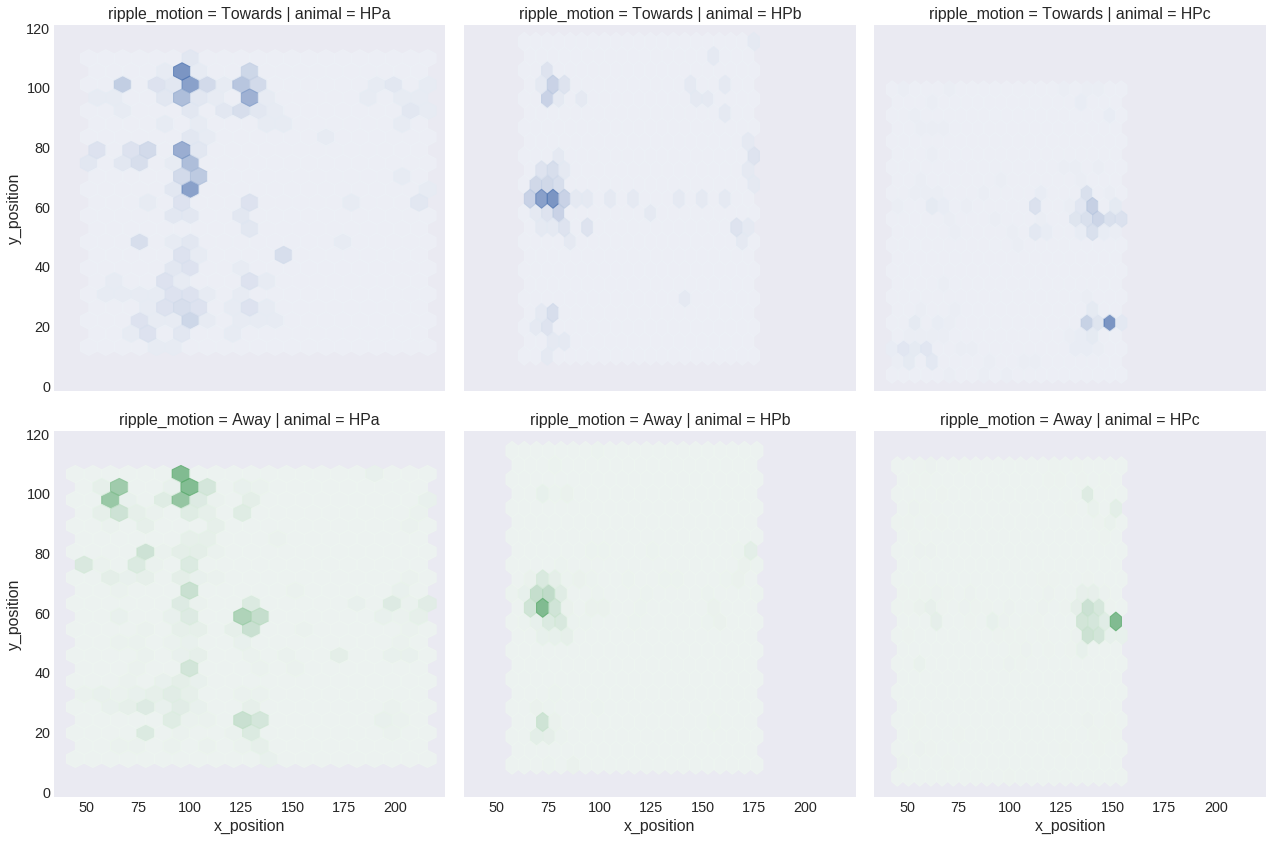

In [26]:
covariate = 'ripple_motion'
with sns.axes_style("dark"):
    g = sns.FacetGrid(ripple_info.reset_index(), row=covariate, col='animal', hue=covariate, size=6)
g.map(hexbin, 'x_position', 'y_position', alpha=.7);

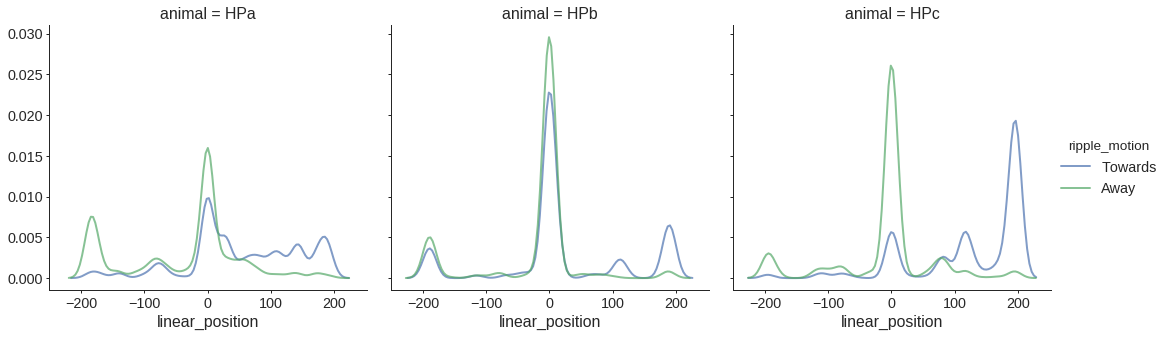

In [60]:
covariate = 'ripple_motion'
g = sns.FacetGrid(ripple_info.reset_index(), col='animal', hue=covariate, size=5)
g.map(sns.kdeplot, 'linear_position', alpha=0.7, bw=10);
g.add_legend();

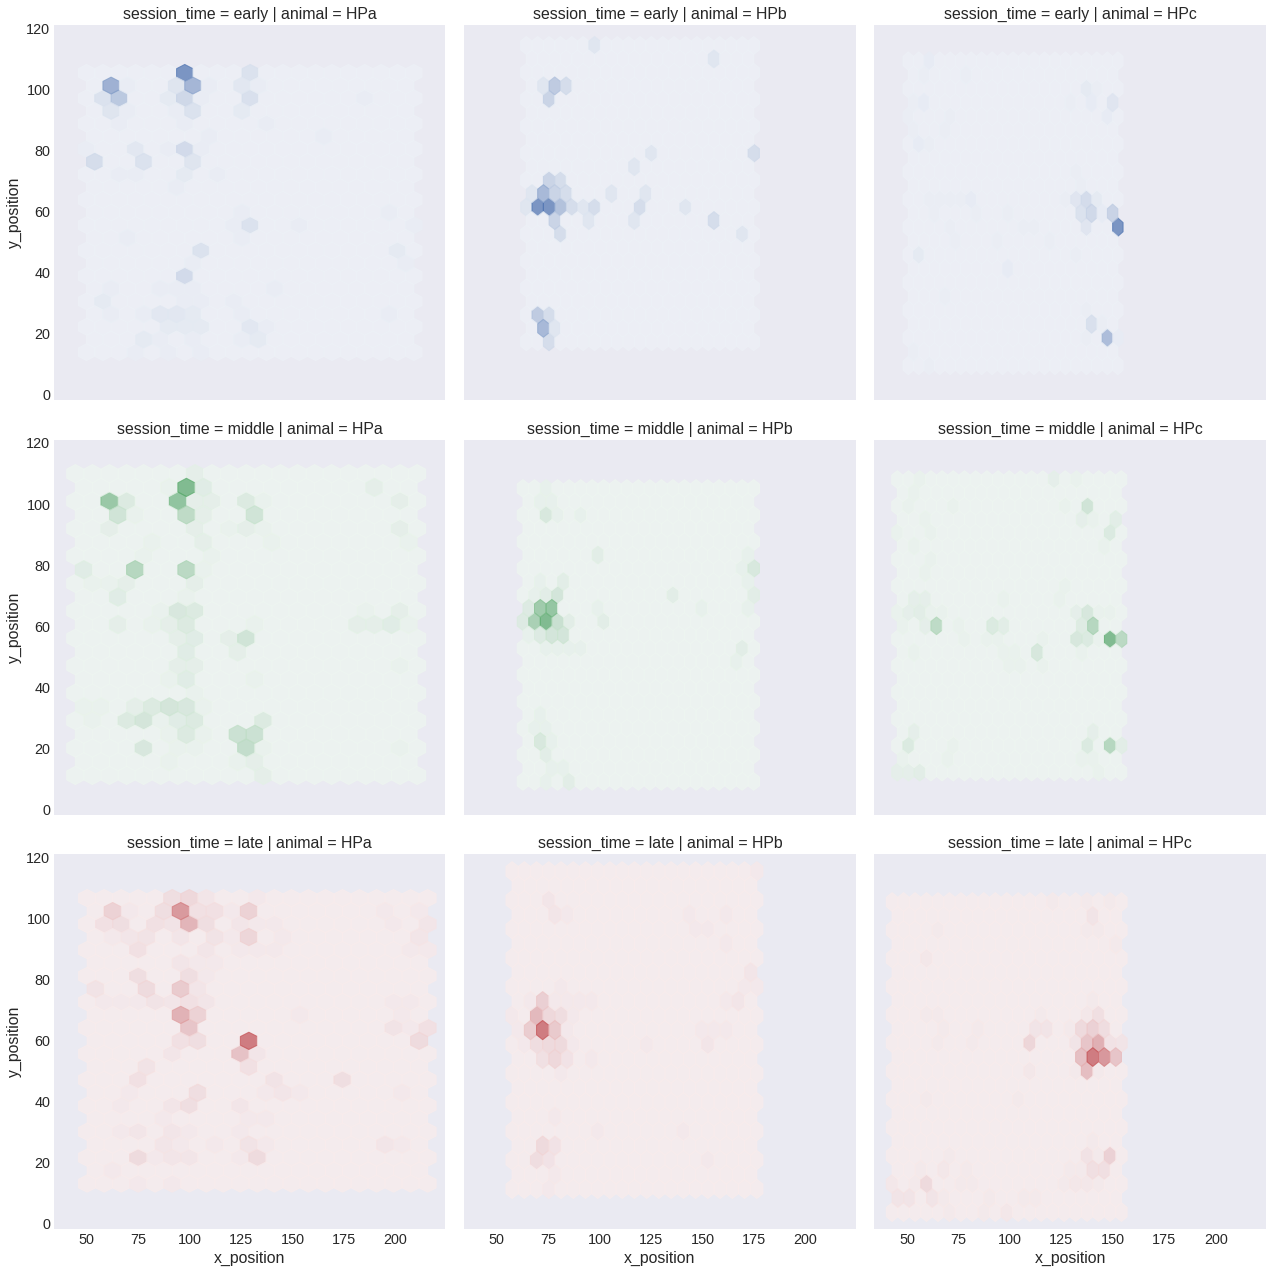

In [73]:
covariate = 'session_time'
with sns.axes_style("dark"):
    g = sns.FacetGrid(ripple_info.reset_index(), row=covariate, col='animal', hue=covariate, size=6)
g.map(hexbin, 'x_position', 'y_position', alpha=.7);

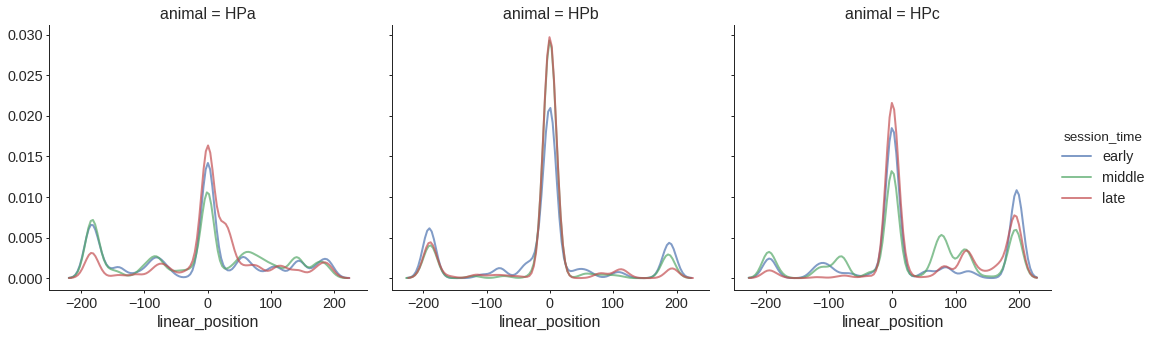

In [61]:
covariate = 'session_time'
g = sns.FacetGrid(ripple_info.reset_index(), col='animal', hue=covariate, size=5)
g.map(sns.kdeplot, 'linear_position', alpha=0.7, bw=10);
g.add_legend();

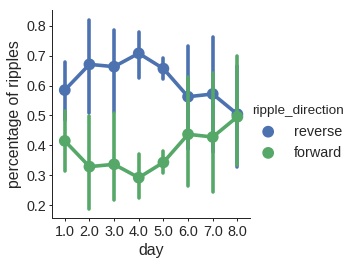

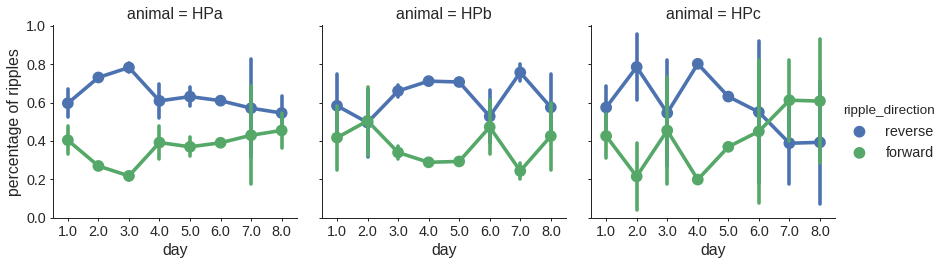

In [39]:
covariate = 'ripple_direction'
percentage_of_ripples = (ripple_info.reset_index()
 .groupby(['animal', 'day', 'epoch'])[covariate].value_counts(normalize=True)
 .rename('percentage of ripples').reset_index())

sns.factorplot(data=percentage_of_ripples, x='day', y='percentage of ripples', hue=covariate);
sns.factorplot(data=percentage_of_ripples, x='day', y='percentage of ripples', hue=covariate, col='animal');

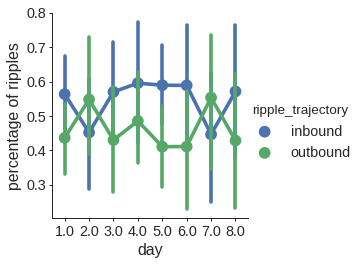

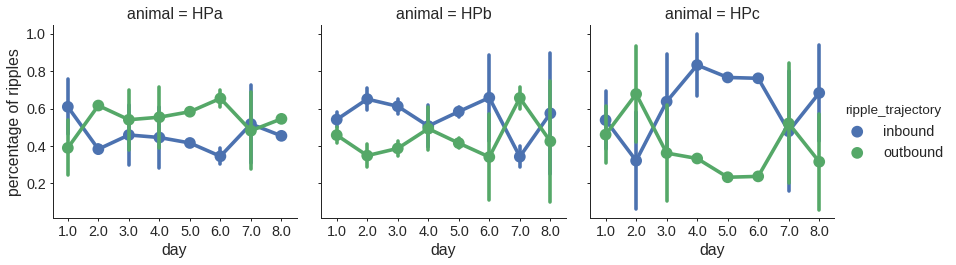

In [38]:
covariate = 'ripple_trajectory'
percentage_of_ripples = (ripple_info.reset_index()
 .groupby(['animal', 'day', 'epoch'])[covariate].value_counts(normalize=True)
 .rename('percentage of ripples').reset_index())

sns.factorplot(data=percentage_of_ripples, x='day', y='percentage of ripples', hue=covariate);
sns.factorplot(data=percentage_of_ripples, x='day', y='percentage of ripples', hue=covariate, col='animal');

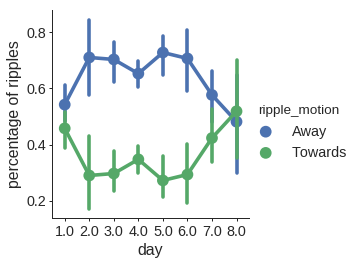

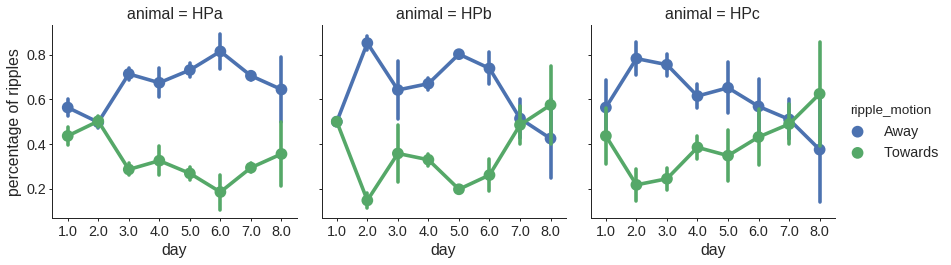

In [37]:
covariate = 'ripple_motion'
percentage_of_ripples = (ripple_info.reset_index()
 .groupby(['animal', 'day', 'epoch'])[covariate].value_counts(normalize=True)
 .rename('percentage of ripples').reset_index())

sns.factorplot(data=percentage_of_ripples, x='day', y='percentage of ripples', hue=covariate);
sns.factorplot(data=percentage_of_ripples, x='day', y='percentage of ripples', hue=covariate, col='animal');

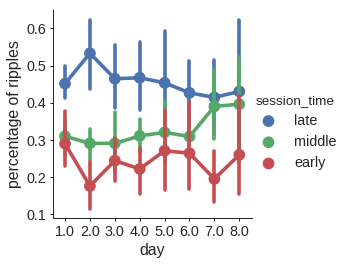

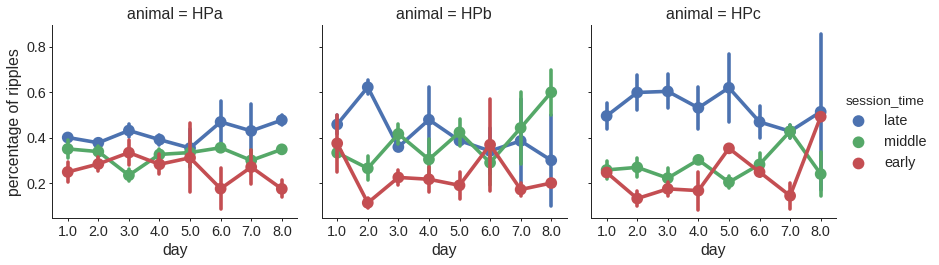

In [36]:
covariate = 'session_time'
percentage_of_ripples = (ripple_info.reset_index()
 .groupby(['animal', 'day', 'epoch'])[covariate].value_counts(normalize=True)
 .rename('percentage of ripples').reset_index())

sns.factorplot(data=percentage_of_ripples, x='day', y='percentage of ripples', hue=covariate);
sns.factorplot(data=percentage_of_ripples, x='day', y='percentage of ripples', hue=covariate, col='animal');